# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [53]:
# Import essential libraries for data manipulation and analysis
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [54]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [55]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [56]:
# Convert categorical features to category type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [57]:
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    df[col] = df[col].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [58]:
# Calculate time taken in minutes

df['delivery_duration'] = (pd.to_datetime(df['actual_delivery_time']) - pd.to_datetime(df['created_at'])).dt.total_seconds() / 60

# Preview the new column
df[['created_at','actual_delivery_time','delivery_duration']].head()

created_at actual_delivery_time  delivery_duration
0 2015-02-06 22:24:17  2015-02-06 23:11:17               47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25               44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35               55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46               59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36               46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [59]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_dayofweek'].isin([5, 6]).astype(int)


In [60]:
# Drop unnecessary columns
df = df.drop(columns=['created_at', 'actual_delivery_time'])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [61]:
# Define target variable (y) and features (X)

y = df['delivery_duration']

X = df.drop(columns=['delivery_duration'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [62]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [63]:
# Define numerical and categorical columns for easy EDA and data manipulation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  delivery_duration         175777 non-null  float64 
 13  order_hour                175

In [64]:
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend', 'order_dayofweek']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

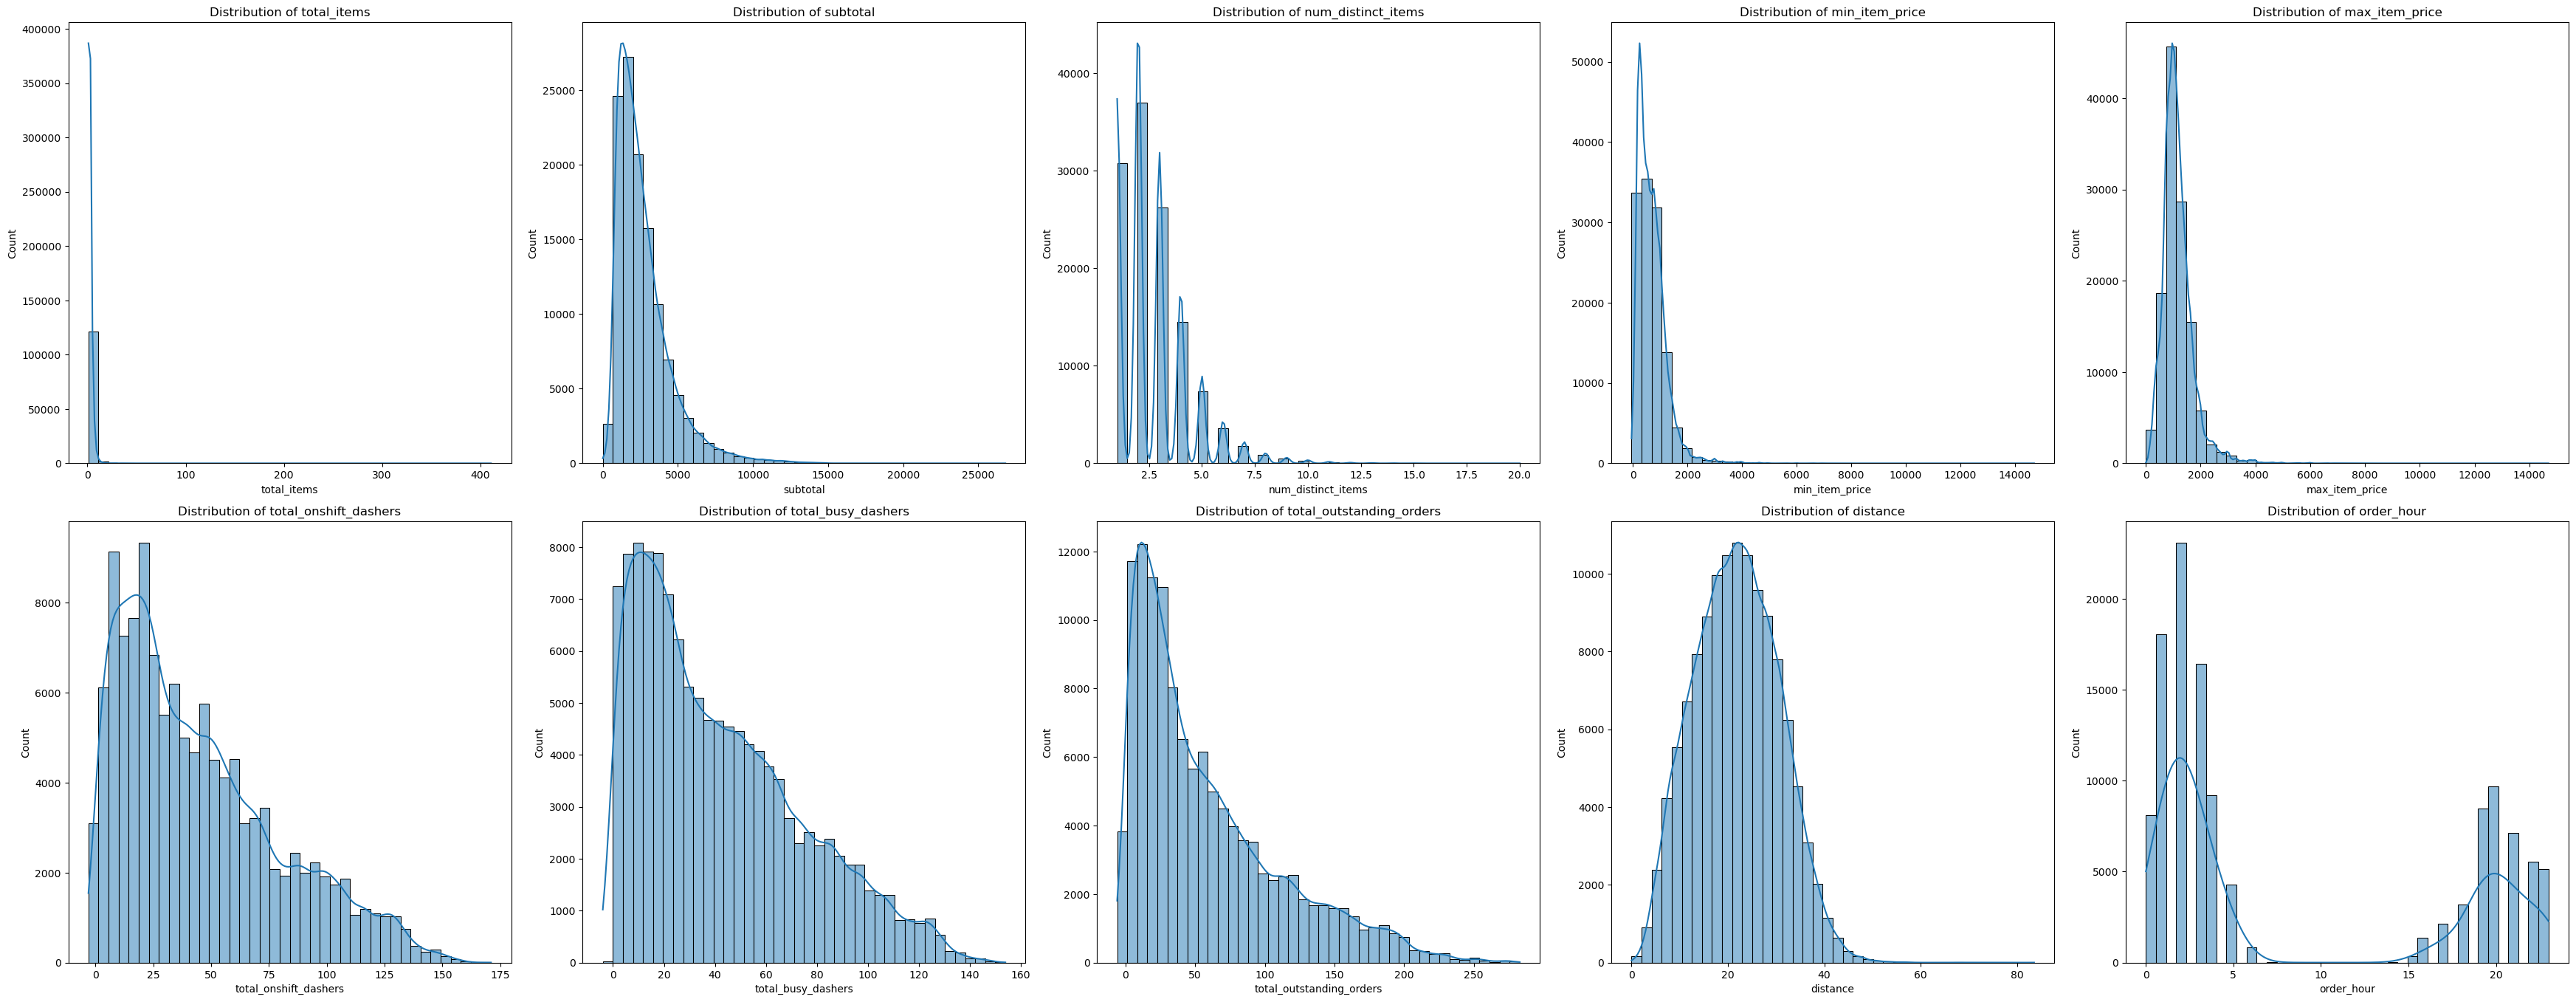

In [65]:
# Plot distributions for all numerical columns

plt.figure(figsize=(35,20))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(3,5,i)
    sns.histplot(X_train[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

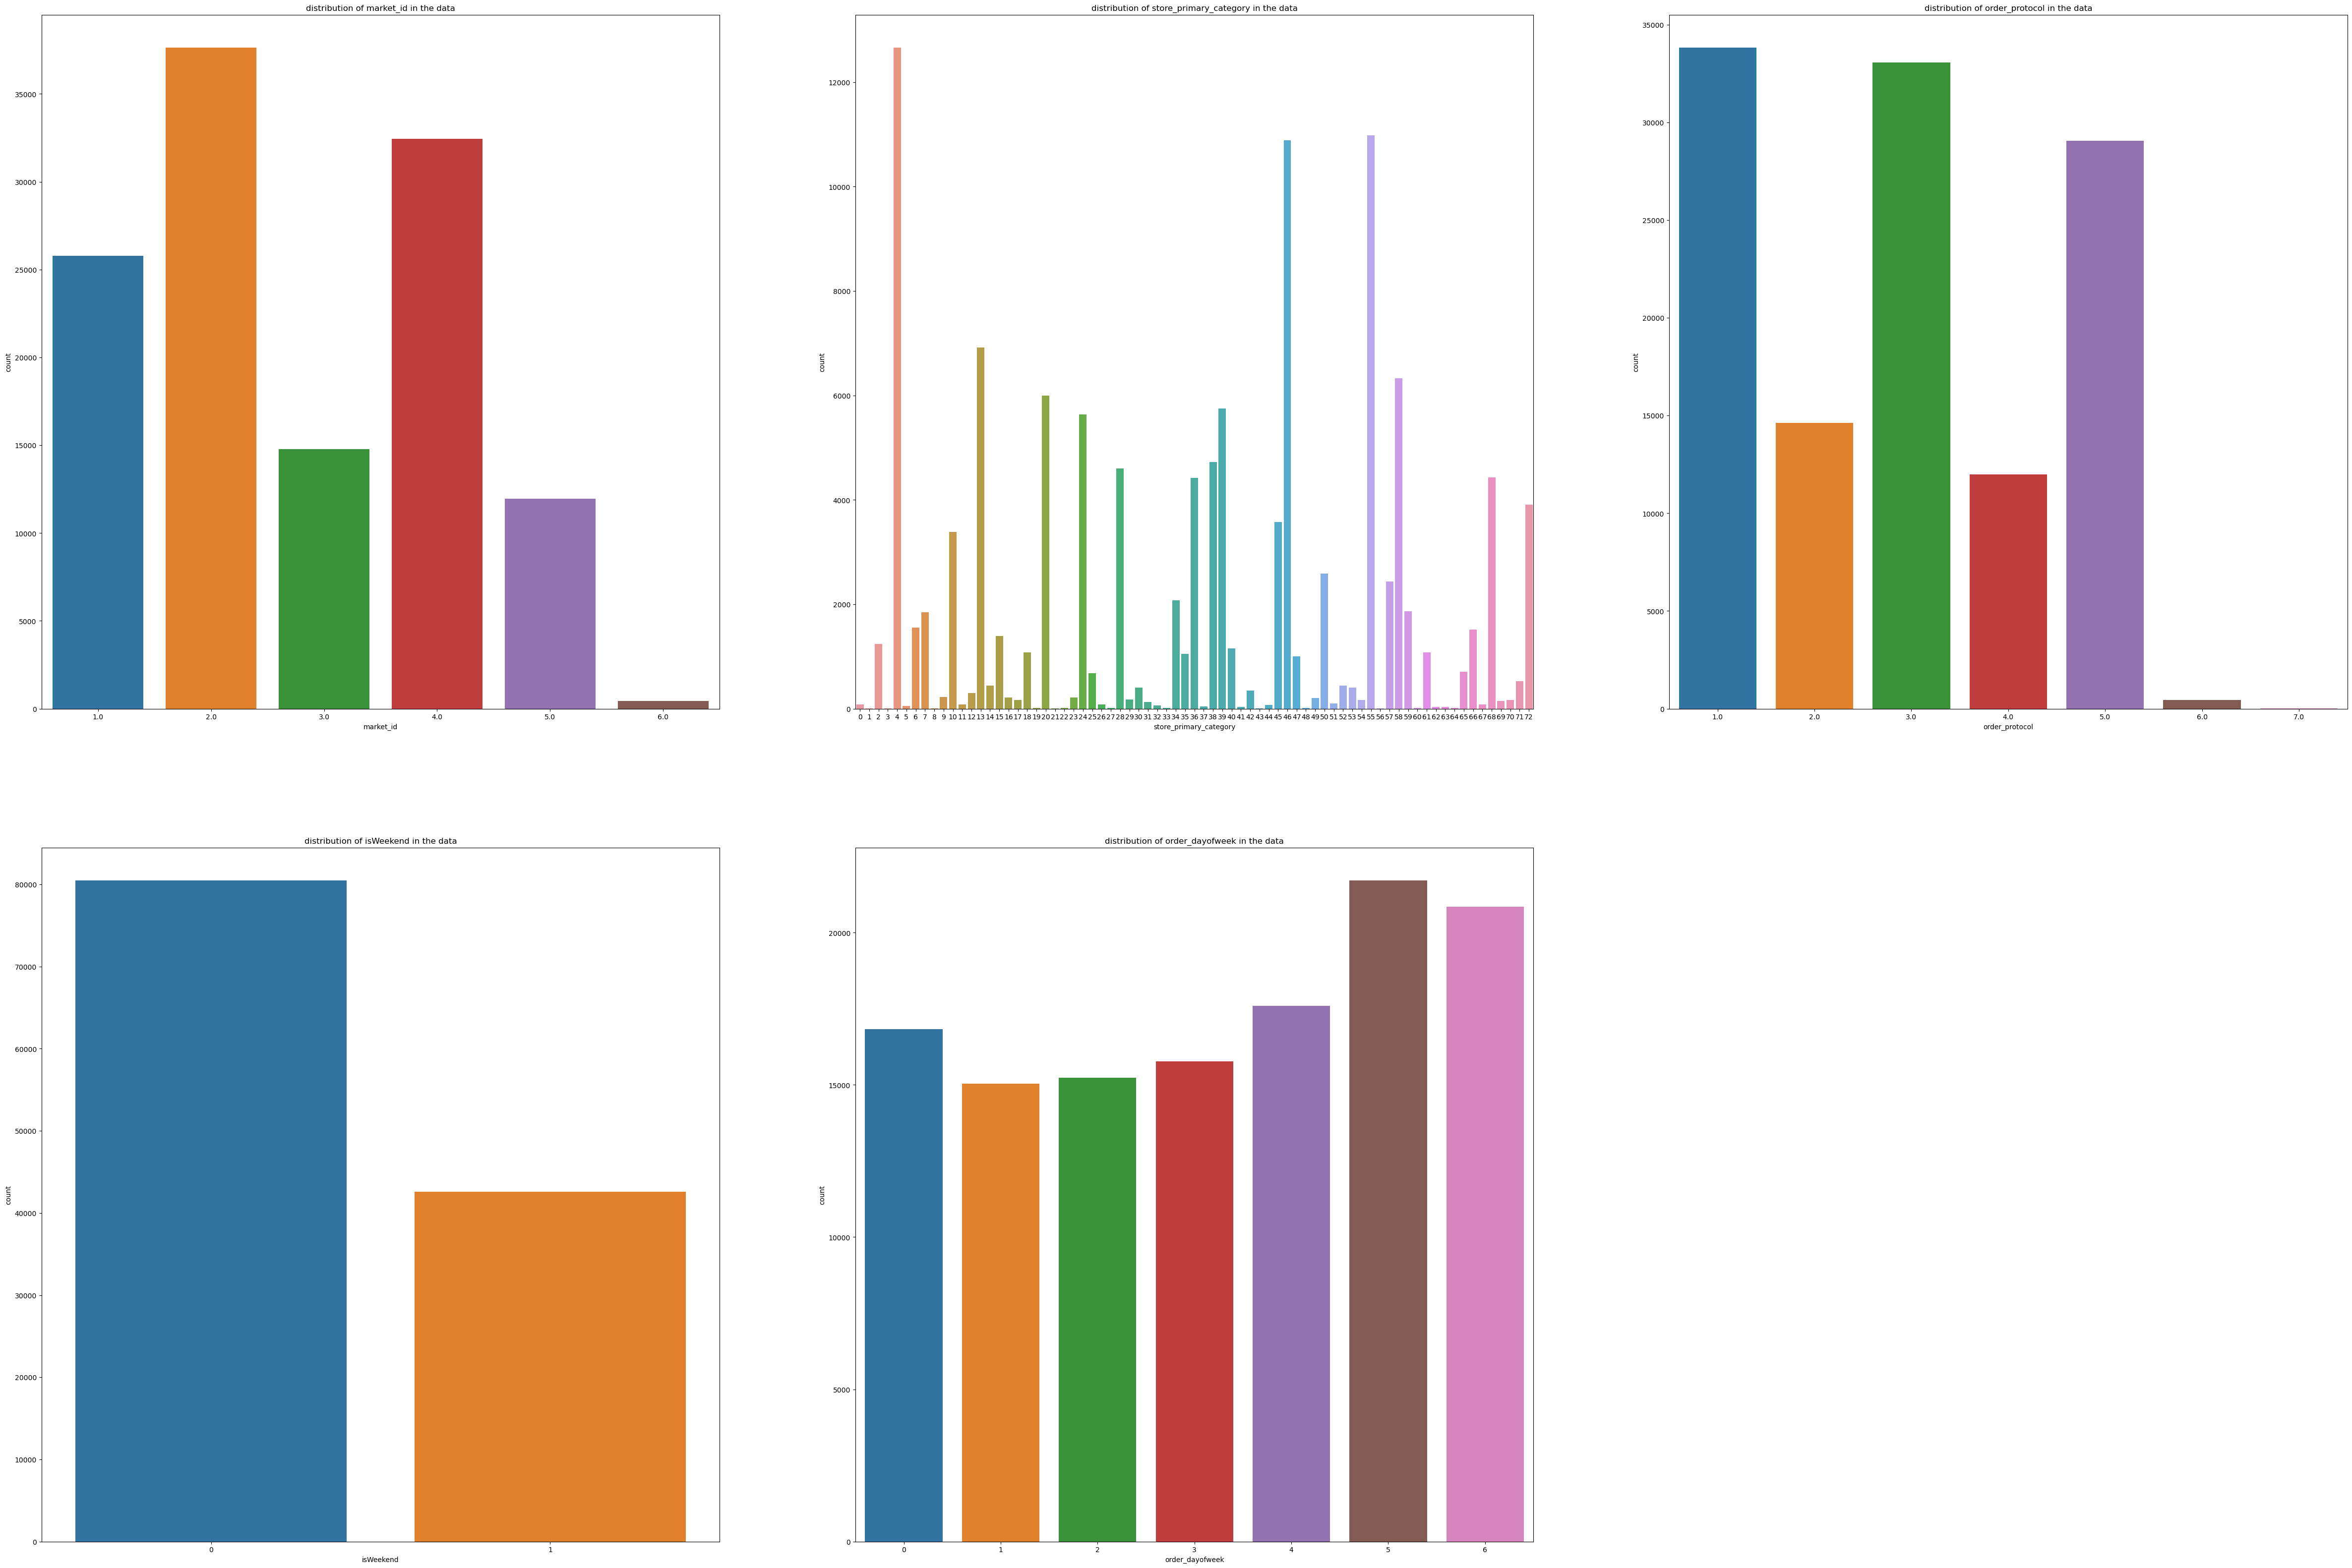

In [66]:
# Distribution of categorical columns

plt.figure(figsize=(60,40))
for i,col in enumerate(categorical_cols,1):
    plt.subplot(2,3,i)
    sns.countplot(x=X_train[col])
    plt.title(f'distribution of {col} in the data')
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: xlabel='delivery_duration', ylabel='Count'>

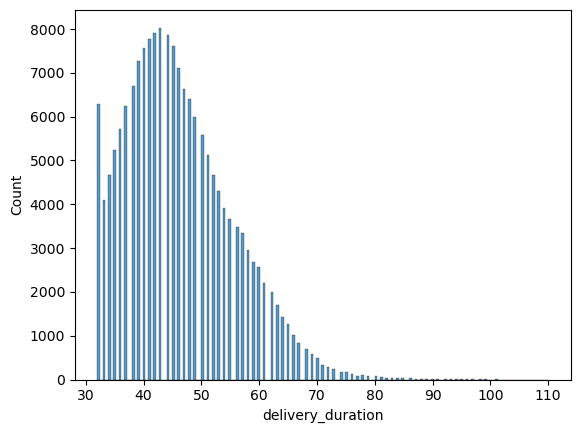

In [67]:
# Distribution of time_taken

sns.histplot(y)

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

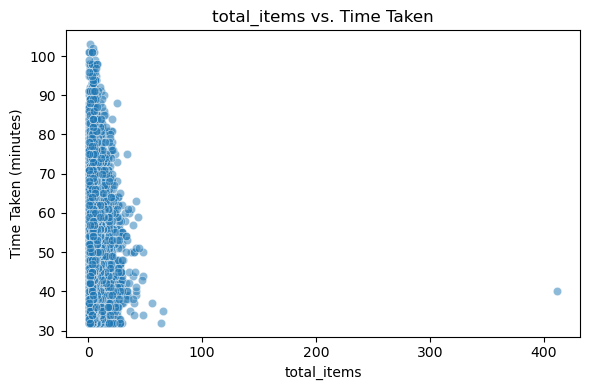

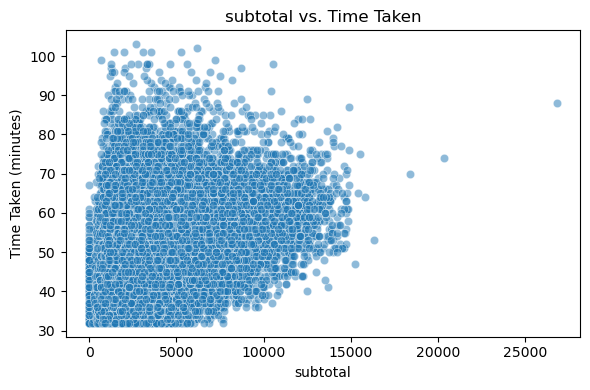

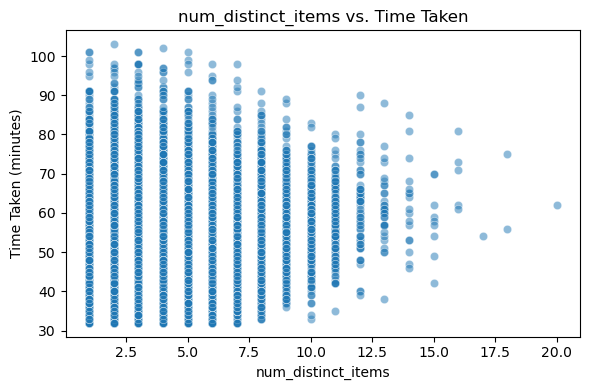

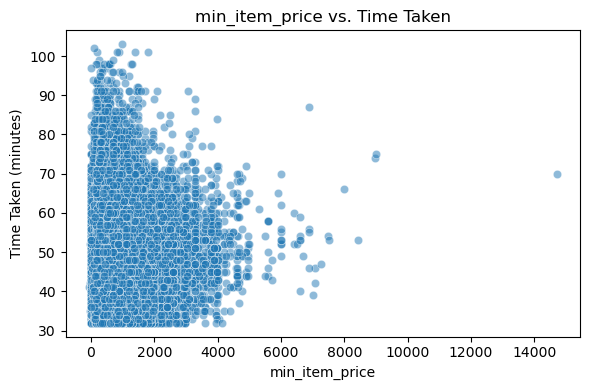

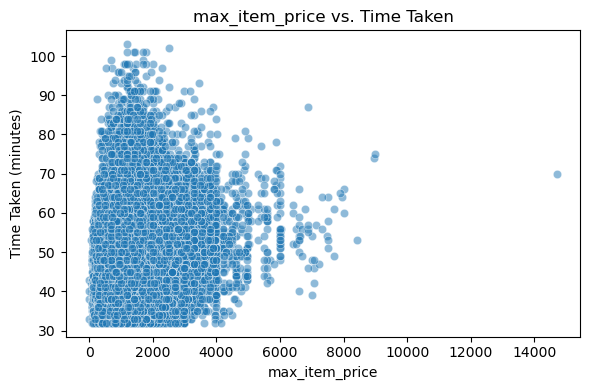

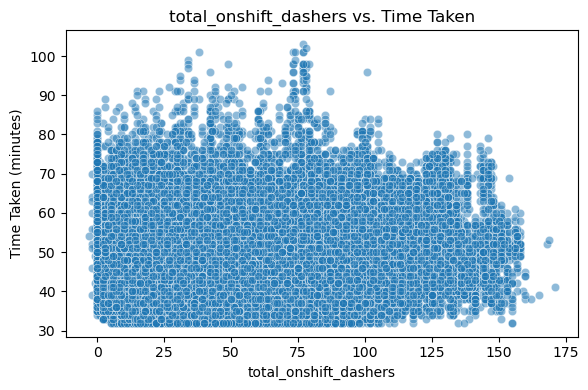

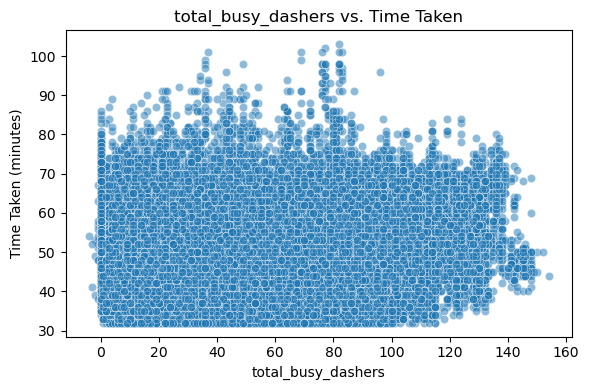

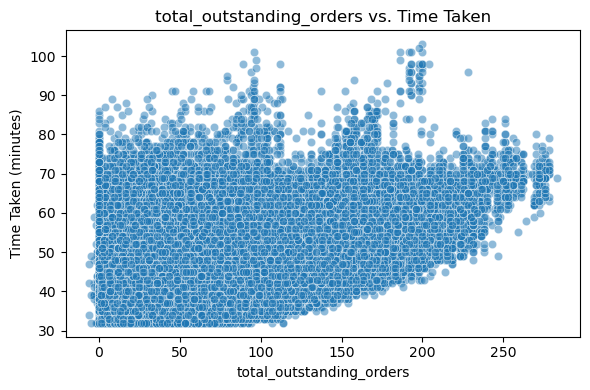

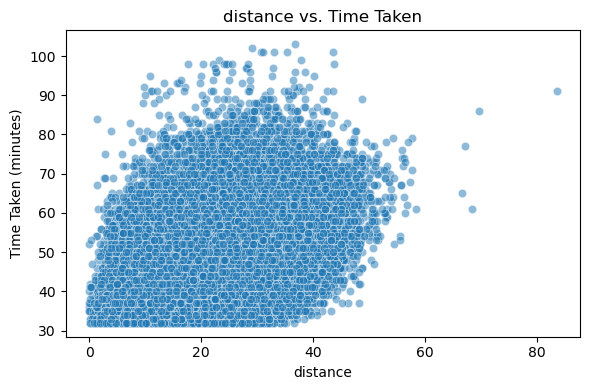

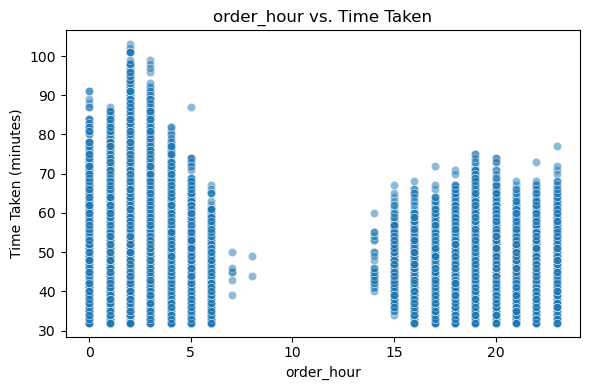

In [68]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5)
    plt.title(f'{col} vs. Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.tight_layout()
    plt.show()

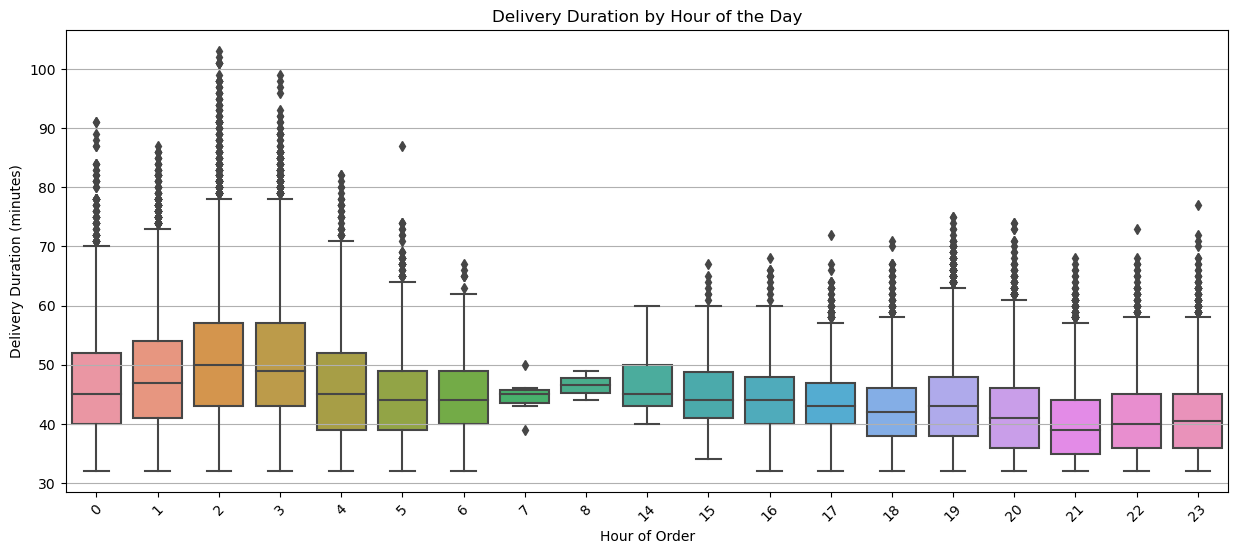

In [69]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(15,6))
sns.boxplot(x=X_train['order_hour'],y=y)
plt.title('Delivery Duration by Hour of the Day')
plt.xlabel('Hour of Order')
plt.ylabel('Delivery Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True,axis='y')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

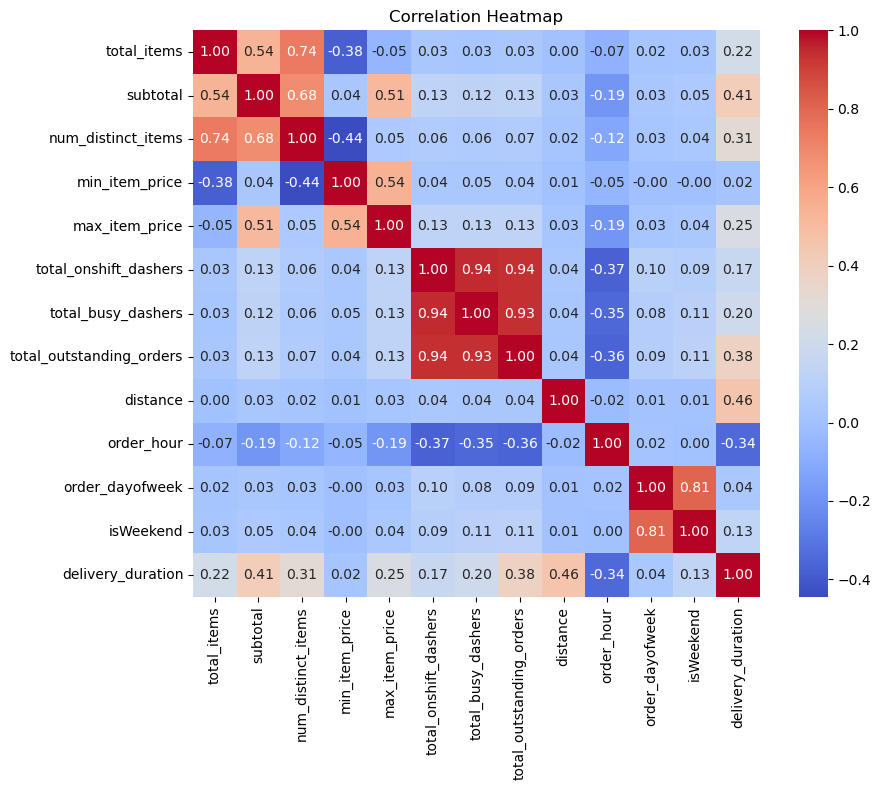

In [70]:
# Plot the heatmap of the correlation matrix

df_corr = X_train.copy()
df_corr['delivery_duration'] = y_train


# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [71]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123043 entries, 94746 to 38408
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 123043 non-null  category
 1   store_primary_category    123043 non-null  category
 2   order_protocol            123043 non-null  category
 3   total_items               123043 non-null  int64   
 4   subtotal                  123043 non-null  int64   
 5   num_distinct_items        123043 non-null  int64   
 6   min_item_price            123043 non-null  int64   
 7   max_item_price            123043 non-null  int64   
 8   total_onshift_dashers     123043 non-null  float64 
 9   total_busy_dashers        123043 non-null  float64 
 10  total_outstanding_orders  123043 non-null  float64 
 11  distance                  123043 non-null  float64 
 12  order_hour                123043 non-null  int64   
 13  order_dayofweek           

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [72]:
# Drop 3-5 weakly correlated columns from training dataset

# Calculate correlation with the target
correlations = df_corr.corr()['delivery_duration'].drop('delivery_duration')

# Sort by absolute correlation
weak_corr_features = correlations.abs().sort_values().head(5).index.tolist()

print("Dropping weakly correlated features:", weak_corr_features)

# Drop from training and testing sets
X_train = X_train.drop(columns=weak_corr_features)
X_test = X_test.drop(columns=weak_corr_features)


Dropping weakly correlated features: ['min_item_price', 'order_dayofweek', 'isWeekend', 'total_onshift_dashers', 'total_busy_dashers']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

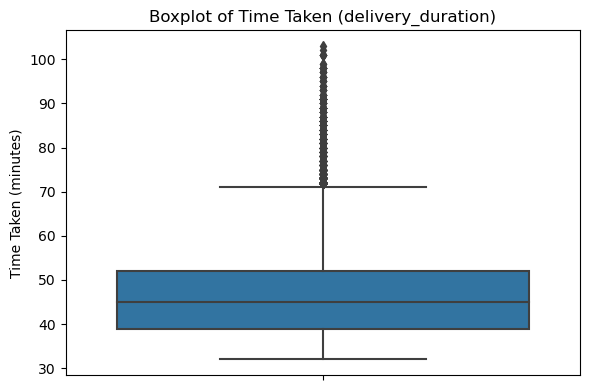

In [73]:
# Boxplot for time_taken

plt.figure(figsize=(6, 4))
sns.boxplot(y=y_train)
plt.title('Boxplot of Time Taken (delivery_duration)')
plt.ylabel('Time Taken (minutes)')
plt.tight_layout()
plt.show()

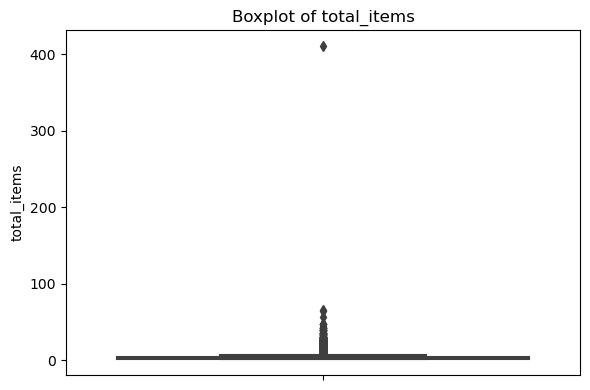

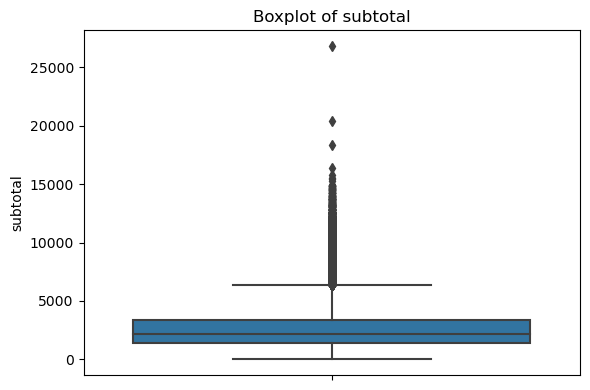

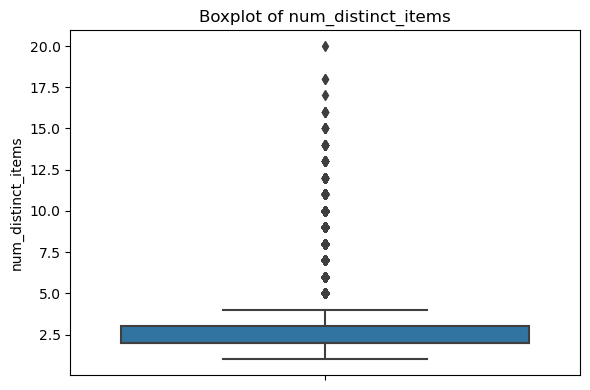

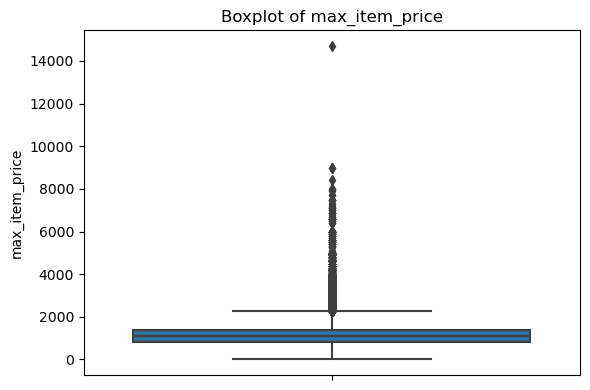

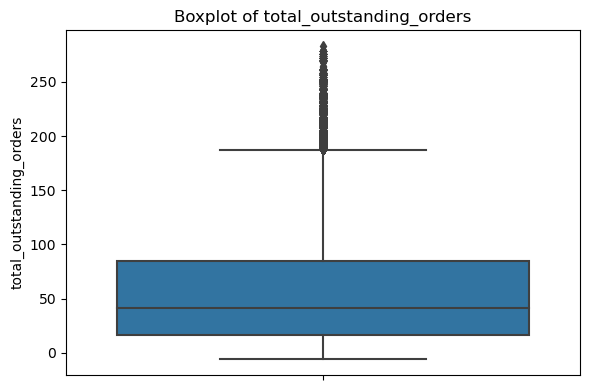

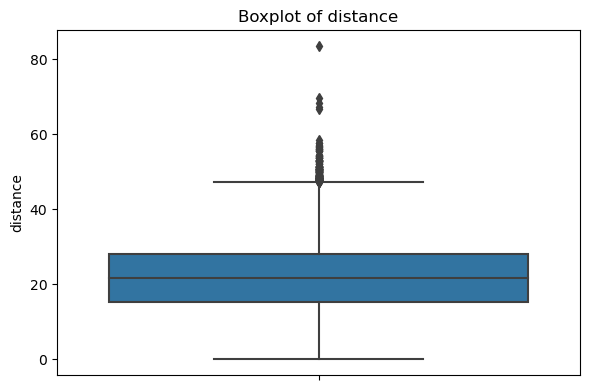

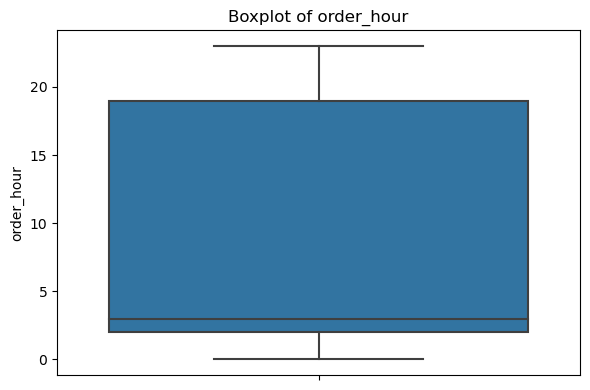

In [74]:
# Select only numerical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64'])

# Plot boxplots for each column
for col in numeric_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=numeric_X[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [75]:
# Handle outliers

for col in numeric_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Option 1: Clip outliers (safer for retaining all data)
    X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [76]:
# Import libraries

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [77]:
# Apply scaling to the numerical columns

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# Fit and transform training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform test data using the same scaler
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [78]:
# Create/Initialise the model

# Using Scikit-learn
from sklearn.linear_model import LinearRegression

# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

### SM model 1

In [79]:
import statsmodels.api as sm

# Add constant for intercept
X_train_sm = sm.add_constant(X_train)

# Fit model
sm_model_1 = sm.OLS(y_train, X_train_sm).fit()

# View detailed summary
print(sm_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:      delivery_duration   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                 1.339e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        19:08:33   Log-Likelihood:            -4.0411e+05
No. Observations:              123043   AIC:                         8.082e+05
Df Residuals:                  123032   BIC:                         8.083e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3               total_items  6.42
4                  subtotal  4.59
5        num_distinct_items  4.58
2            order_protocol  3.43
0                 market_id  3.34
1    store_primary_category  3.27
6            max_item_price  2.57
9                order_hour  1.21
7  total_outstanding_orders  1.18
8                  distance  1.00

### SM model 2

In [81]:
X_train.drop(columns=['total_items'], inplace=True)


In [82]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)

# Fit model
sm_model_2 = sm.OLS(y_train, X_train_sm).fit()

# View detailed summary
print(sm_model_2.summary())



                            OLS Regression Results                            
Dep. Variable:      delivery_duration   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                 1.486e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        19:09:11   Log-Likelihood:            -4.0414e+05
No. Observations:              123043   AIC:                         8.083e+05
Df Residuals:                  123033   BIC:                         8.084e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2            order_protocol  3.42
0                 market_id  3.34
1    store_primary_category  3.27
3                  subtotal  3.24
4        num_distinct_items  2.23
5            max_item_price  1.92
8                order_hour  1.21
6  total_outstanding_orders  1.18
7                  distance  1.00

###  All the VIFs are below 5 and P values less than 0.05 , with R square value of 0.521

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [84]:
# Loop through the number of features and test the model

# lr_model is created previously using sikit-learn , will create RFE using all the features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize linear regression model
lr = LinearRegression()

# Apply RFE with all features, removing 1 feature per iteration
rfe = RFE(estimator=lr, n_features_to_select=8, step=1)
rfe.fit(X_train, y_train)

# Create a DataFrame to analyze ranking
rfe_results = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values(by='Ranking')

print(rfe_results)

                    Feature  Ranking  Selected
0                 market_id        1      True
2            order_protocol        1      True
3                  subtotal        1      True
4        num_distinct_items        1      True
5            max_item_price        1      True
6  total_outstanding_orders        1      True
7                  distance        1      True
8                order_hour        1      True
1    store_primary_category        2     False


In [85]:
# Build the final model with selected number of features

col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_rfe)

# Fit model
sm_model_3 = sm.OLS(y_train, X_train_sm).fit()

# View detailed summary
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:      delivery_duration   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                 1.672e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        19:19:09   Log-Likelihood:            -4.0414e+05
No. Observations:              123043   AIC:                         8.083e+05
Df Residuals:                  123034   BIC:                         8.084e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                  subtotal  3.23
1            order_protocol  2.76
0                 market_id  2.74
3        num_distinct_items  2.23
4            max_item_price  1.92
7                order_hour  1.21
5  total_outstanding_orders  1.18
6                  distance  1.00

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Text(0.5, 0, 'Errors')

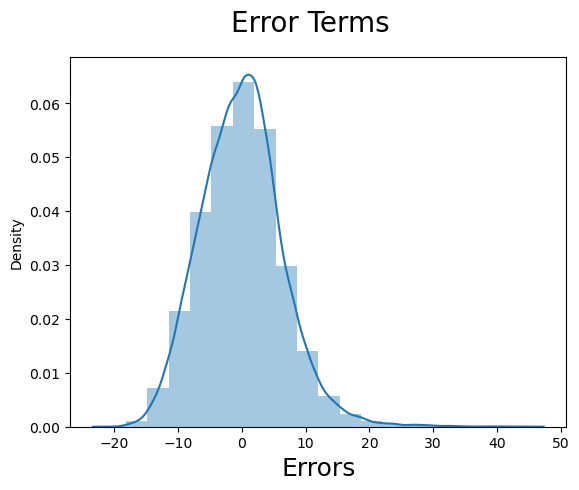

In [89]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_train_duration = sm_model_3.predict(X_train_sm)

fig = plt.figure()
sns.distplot((y_train - y_train_duration), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [91]:
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [92]:

y_pred = sm_model_3.predict(X_test_new)

# Residuals
residuals = y_test - y_pred

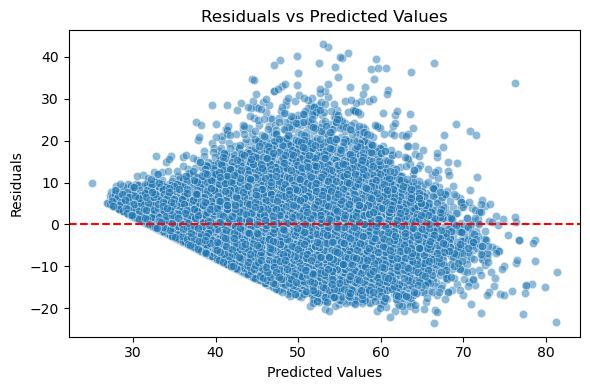

In [93]:
#Residuals vs. Predicted Values Plot

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

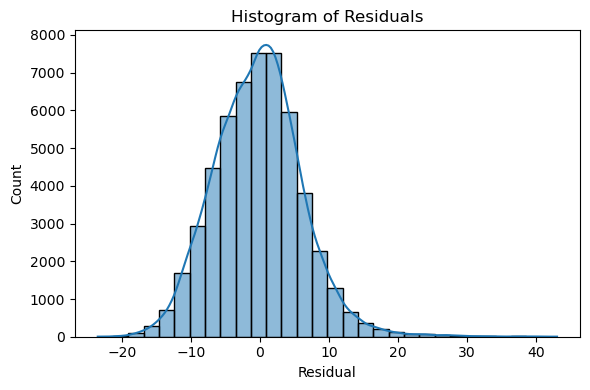

In [94]:
# histogram of residuals

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.tight_layout()
plt.show()

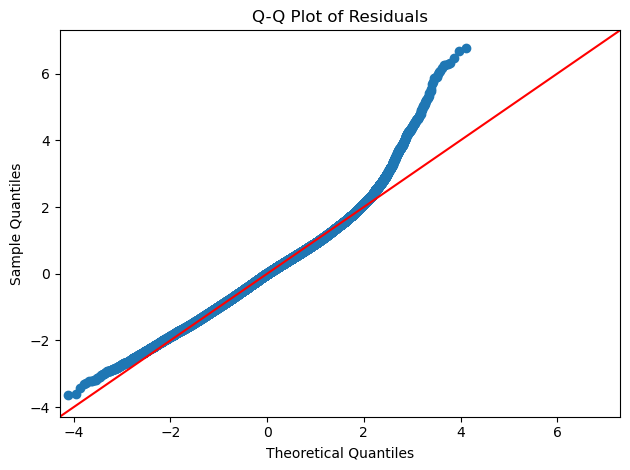

In [95]:
# Normality check using Q-Q plot

import scipy.stats as stats
import statsmodels.api as sm

# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

In [96]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.5289

Text(0, 0.5, 'y_pred')

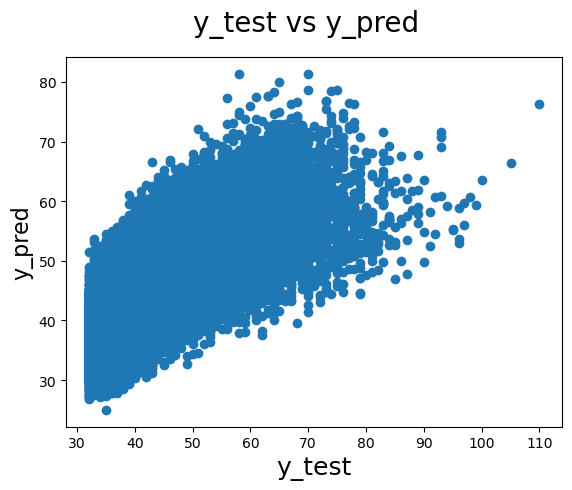

In [97]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

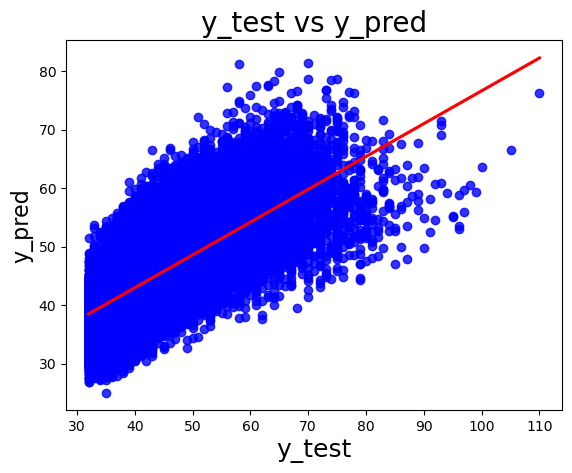

In [98]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [100]:
# Compare the scaled vs unscaled features used in the final model

# Coefficients from statsmodels
scaled_coefs = pd.Series(sm_model_3.params[1:], index=X_train.columns)  # exclude intercept
scaled_coefs.name = 'Scaled Coefficient'


# Compute std of target and each feature (before scaling)
X_unscaled_std = X[numerical_cols].std()
y_std = y.std()

# Re-scale coefficients to original units
unscaled_coefs = scaled_coefs * (y_std / X_unscaled_std)
unscaled_coefs.name = 'Unscaled Coefficient'

In [101]:
coef_comparison = pd.concat([scaled_coefs, unscaled_coefs], axis=1)

# Sort by absolute scaled coefficient for feature importance
coef_comparison['abs_scaled'] = coef_comparison['Scaled Coefficient'].abs()
coef_comparison = coef_comparison.sort_values('abs_scaled', ascending=False).drop(columns='abs_scaled')

print(coef_comparison)

                          Scaled Coefficient  Unscaled Coefficient
distance                            4.050959              4.318923
total_outstanding_orders            2.614361              0.462446
subtotal                            2.520815              0.012859
order_hour                         -1.519920             -1.633889
order_protocol                     -0.946271                   NaN
market_id                          -0.746259                   NaN
num_distinct_items                  0.582120              3.339944
max_item_price                      0.048943              0.000814
store_primary_category                   NaN                   NaN
min_item_price                           NaN                   NaN
total_busy_dashers                       NaN                   NaN
total_items                              NaN                   NaN
total_onshift_dashers                    NaN                   NaN


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [105]:
# Analyze the effect of a unit change in a feature, say 'distance'

scaled_coef_distance = scaled_coefs['distance']

std_distance = X['distance'].std()
std_target = y.std()

In [106]:
unit_effect_distance = scaled_coef_distance * (std_target / std_distance)
print(f"Effect of 1-unit increase in 'distance' on delivery time: {unit_effect_distance:.2f} minutes")

Effect of 1-unit increase in 'distance' on delivery time: 4.32 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> yes there are categorical variables , below are been idenfied as categorical

'market_id', 'store_primary_category', 'order_protocol', 'isWeekend', 'order_dayofweek'

> store_primary_category was less significant and not contributing much to the duration hence removed during RFE feature selection

> order_dayofweek , isWeekend has less correlation with Duration

> market_id , order_protocol has negative coefficents indicating increase in the value of these variables would decrease the Duration






---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> The whole data would be split with test size 20% and train size as 80%



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance has highest correlation of 0.46 with delivery_duration



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Detected outliers using box plot and used Interquartile Range (IQR) method to remove them



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Top 3 features significantly affecting delivery time are distance(4.050959),total_outstanding_orders(2.614361) and subtotal(2.520815)        



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear Regression is a supervised learning algorithm used to model the relationship between one or more independent variables (features) and a continuous dependent variable (target).

It assumes that this relationship can be approximated by a straight line (or a hyperplane in multiple dimensions).

Assumptions of Linear Regression
1. Linearity: The relationship between features and target is linear.

2. Independence: Observations are independent of each other.

3. Homoscedasticity: Constant variance of residuals.

4. No multicollinearity: Features shouldn’t be highly correlated with each other.

5. Normality: Residuals should be normally distributed (important for inference).



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression models the relationship between one independent variable and one dependent variable using a straight line.
Formula : y=β0+β1x+ϵ

>Multiple Linear Regression models the relationship between two or more independent variables and a single dependent variable.
y=β0+β1X1+β2X2....+βnXn + ϵ




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression plays a critical role — it quantifies how well the model's predictions match the actual data. The goal of training the model is to minimize this cost.
> It is minimized usning Normal Equation (exact) or Gradient Descent (iterative)
> scikit-learn and statsmodel libraries can be used



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.




**Answer:**

>> Underfitting is the model is too simple to capture the underlying structure of the data.
> Not enough training or features, High error on both training and testing data


> Overfitting is The model is too complex and captures random fluctuations in the training data as if they were true patterns.
> Too many features or overly flexible models
> Very low error on training data, High error on test data — poor generalization.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>A residual is the difference between the actual and predicted value
> Residual helps in Linearity Check,  Homoscedasticity (Constant Variance), Outlier Detection, Independence of Errors